## Telling Stories by Maggie Zhang

In [1]:
#Import Libraries into Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#To Display Graphs in Line
%matplotlib inline

#To Specify How Large to Show the Figures
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
#Load up CSV File into Python
superheroes = pd.read_csv("superhero_plots.csv", parse_dates = ["FIRST_YEAR"])

In [3]:
#First, Let's Replacing Some Variables
#Load All the Data in a New Variable
combined_superheroes = superheroes

#Let's Replacing "Male Character" with "Male"
combined_superheroes = combined_superheroes.replace("Male Character", "Male")
#Let's Replacing "Male Characters" with "Male"
combined_superheroes = combined_superheroes.replace("Male Characters", "Male")

#Let's Replacing "Female Character" with "Female"
combined_superheroes = combined_superheroes.replace("Female Character", "Female")
#Let's Replacing "Female Characters" with "Female"
combined_superheroes = combined_superheroes.replace("Female Characters", "Female")

In [4]:
#Introduce the DataFrame
df = pd.DataFrame(data = superheroes)

## Theme of My Analysis

##### In this project, I meant to figure out are male and bad characters really taken more attentions than female and bad characters? The CSV file I analyzed is about the superhereoes from Marvel and DC based on their sex, alignment type, first year, and so. The data is collected mostly well. It has included many detailed information. But some rows and columns are repeated, such as ALIVE and DECEASED, Male Character and Male Characters, and Female Character and Female Characters. In addition, It did not give the data of marriages of the characters, the data of the last year of the characters, and the data of the nationality of the characters.

##### In this project, I used reusing and remixing, abstracting and modulaing, and questioning to conduct the data analysis. I made this project based on the existing skeletons I was provided and the projects I did before. I explored the connections between each single plot and the whole picture to back up my story. And, I did question the world by giving my data questions.

##### 1. What Is the Distribution of New Characters Introduced by Alignment Types?

##### 2. Are There More Male Characters Than Female Characters by Bad Characters?

##### 3. Which Alignment Type Of Male Characters Is More Frequent to Appear?

##### 4. Which Alignment Type Of Female Characters Is More Frequent to Appear?

#### Show the Distributions of New Characters Introduced Based on Alignment Types by Years

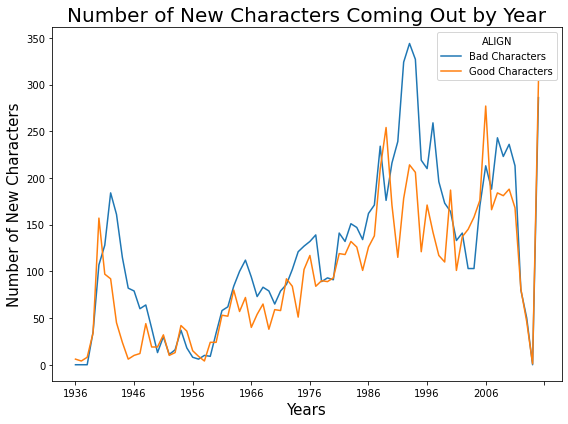

In [5]:
#Here, We Would Use Line Chart

#Drop All the Values Except Bad Characters and Good Characters
characterND = superheroes.drop(superheroes[superheroes.ALIGN == "ND"].index)
characterNC = characterND.drop(characterND[characterND.ALIGN == "Neutral Characters"].index)
characterRC = characterNC.drop(characterNC[characterNC.ALIGN == "Reformed Criminals"].index)
characterBG = characterRC

#A Crosstab of the First Year Characters and Their Alignment Types
bog = pd.crosstab(superheroes['FIRST_YEAR'], characterBG['ALIGN'])

#Plot a Line Chart
bog.plot()

#Customize Plot
plt.title("Number of New Characters Coming Out by Year", fontsize = 20)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of New Characters", fontsize = 15)
plt.tight_layout()
plt.show()

#### My Question:
##### What Is the Distribution of New Good and Bad Characters Introduced by Years?
#### My Answer:
##### The Number of Bad Characters Introduced Are Often More Than That of Good Characters.
##### The Line Chart Indicates That the Trend for Both Alignment Types Are Similar, Increasing Most of the Time.

#### Compare the Number of Male Characters and Female Characters by Alignment Types Respectively

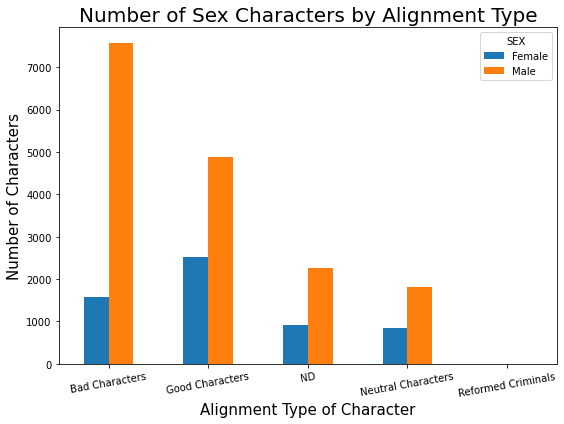

In [6]:
#Here, We Would Use Typical Bar Chart

#Drop All the Values Except Male and Female
genderND = combined_superheroes.drop(combined_superheroes[combined_superheroes.SEX == "ND"].index)
genderA = genderND.drop(genderND[genderND.SEX == "Agender Characters"].index)
genderGL = genderA.drop(genderA[genderA.SEX == "Genderless Characters"].index)
genderGF = genderGL.drop(genderGL[genderGL.SEX == "Genderfluid Characters"].index)
genderT = genderGF.drop(genderGF[genderGF.SEX == "Transgender Characters"].index)
genderMF = genderT

#A Crosstab of Alignment Type & the Sex Column
mof = pd.crosstab(index = superheroes["ALIGN"], columns = genderMF["SEX"])

#Plot a Bar Chart
mof.plot(kind = 'bar')

#Customize Plot
plt.title("Number of Sex Characters by Alignment Type", fontsize = 20)
plt.xticks(rotation = 10, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Alignment Type of Character", fontsize = 15)
plt.ylabel("Number of Characters", fontsize = 15)
plt.tight_layout()
plt.show()

#### My Question: 
##### Are There More Male Characters Than Female Characters by Bad Characters?
#### My Answer: 
##### The Number of Male Bad Characters Is More Than That of Male Good Characters.
##### The Number of Male Bad Characters Is Way More Than That of Female Bad Characters.

#### Show the Alignment Type Of Every Male Character That Appears More Than 500 Times

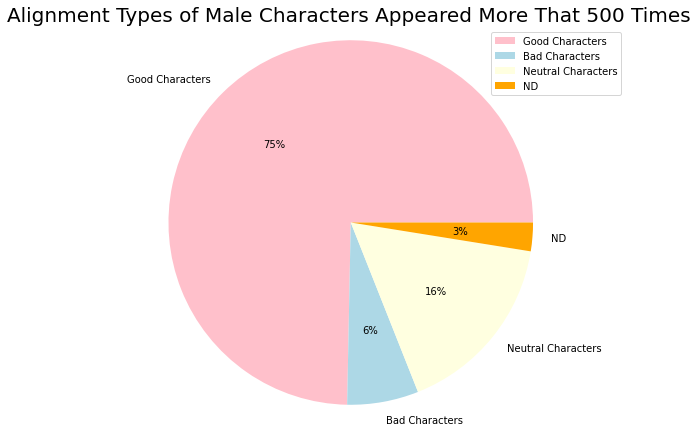

In [7]:
#Initializing a Blank List 
list_character = []

#Give the Number of Rows
num_rows = df.shape[0]

#For Each Row in the Total Rows of the DataFrame for Our File
for row in range(num_rows):
    
    #Skip Any Instance with ND about the Number of Appearances
    if df["APPEARANCES"][row] == "ND":
        continue
        
    #Condition Is Male Characters That Appear More Than 500 Times
    elif df["SEX"][row] == "Male Characters" and int(df["APPEARANCES"][row]) >= 500:
        
        #Now, Add the Name from the Row onto the Blank List
        list_character.append(df["ALIGN"][row])

#Count The Characters Separately
character_count = {}

for i in list_character:
    
    if i in character_count:
            character_count[i] = character_count[i] + 1

    else:
            character_count[i] = 1

#Build Two List x,y
#x Is the Key in the character_count
labels = list(character_count.keys())
#y Is the Values for Each Key
values = list(character_count.values())

#Define Some Custom Colors from this Pre-Defined List
colors = ['pink', 'lightblue', 'lightyellow', 'orange']

#Plot a Pie Chart
plt.pie(values, labels = labels, autopct="%1.0f%%", colors = colors)

#Customize Plot
plt.title("Alignment Types of Male Characters Appeared More That 500 Times", fontsize = 20)
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

#### My Question: 
##### Which Alignment Type Of Male Characters Is More Frequent to Appear?
#### My Answer: 
##### 75% Of the Alignment Type Is Good Characters.
##### 6% Of the Alignment Type Is Bad Characters.

#### Show the Alignment Type Of Every Female Character That Appears More Than 500 Times

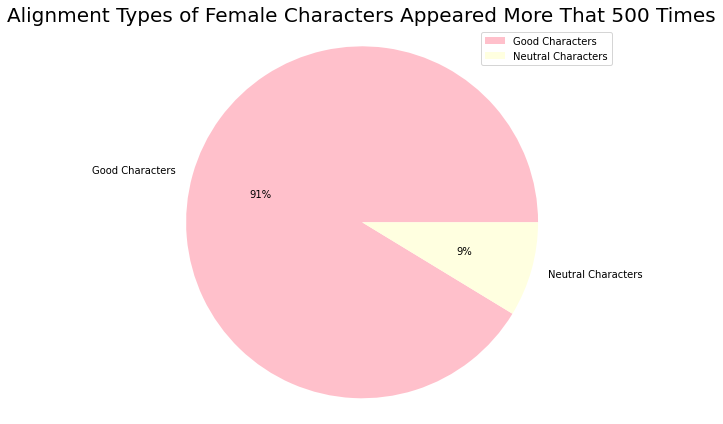

In [8]:
#Initializing a Blank List 
list_character = []

#Give the Number of Rows
num_rows = df.shape[0]

#For Each Row in the Total Rows of the DataFrame for Our File
for row in range(num_rows):
    
    #Skip Any Instance with ND about the Number of Appearances
    if df["APPEARANCES"][row] == "ND":
        continue
        
    #Condition Is Female Characters That Appear More Than 500 Times
    elif df["SEX"][row] == "Female Characters" and int(df["APPEARANCES"][row]) >= 500:
        
        #Now, Add the Name from the Row onto the Blank List
        list_character.append(df["ALIGN"][row])

#Count The Characters Separately
character_count = {}

for i in list_character:
    
    if i in character_count:
            character_count[i] = character_count[i] + 1

    else:
            character_count[i] = 1

#Build Two List x,y
#x Is the Key in the character_count
labels = list(character_count.keys())
#y Is the Values for Each Key
values = list(character_count.values())

#Define Some Custom Colors from this Pre-Defined List
colors = ['pink', 'lightyellow']

#Plot a Pie Chart
plt.pie(values, labels = labels, autopct="%1.0f%%", colors = colors)

#Customize Plot
plt.title("Alignment Types of Female Characters Appeared More That 500 Times", fontsize = 20)
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

#### My Question: 
##### Which Alignment Type Of Female Characters Is More Frequent to Appear?
#### My Answer: 
##### 91% Of the Alignment Type Is Good Characters.
##### There Are No Bad Characters at All.